In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib; matplotlib.rcParams['figure.figsize'] = (10,3)

In [2]:
import numpy as np

In [3]:
# Reload all packages - make debugging easier
%load_ext autoreload
%autoreload 2

In [4]:
from nnmf_svi_eddie import save_graph_parameters, load_graph_parameters

---

Assign your model to `MODEL` here:

In [5]:
from nnmf_svi_eddie import NNMF as MODEL
kwargs = {'D':3, 'Dp':3, 'nn_hidden_layer_dims': [10], 'batch_size':20, 'n_samples':1}

---

In [6]:
# TODO All these seeds are not working. Am I missing other seeds?
import tensorflow as tf
import random
import numpy as np
tf.set_random_seed(123) # TODO this set the graph-level random seed. Maybe I need to do this in the model?
np.random.seed(123)
random.seed(123)

User 1 is being shown 1 item at a time, from left to right.


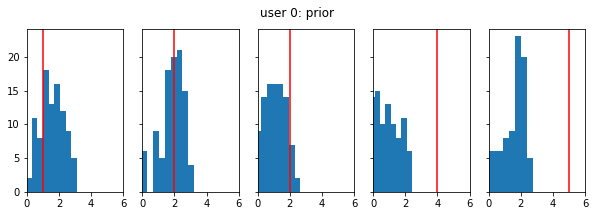

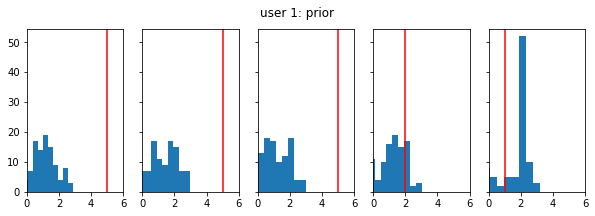

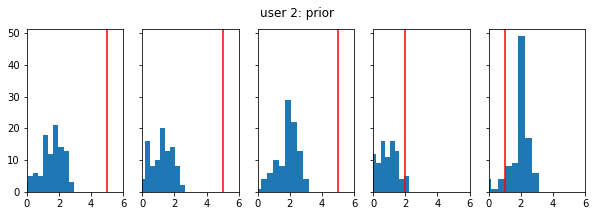

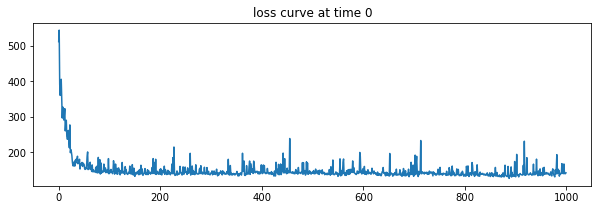

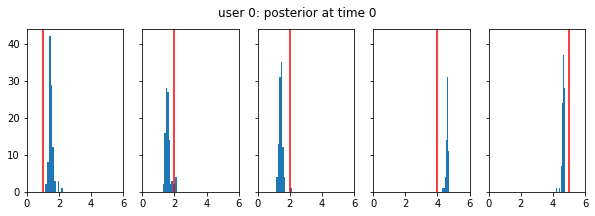

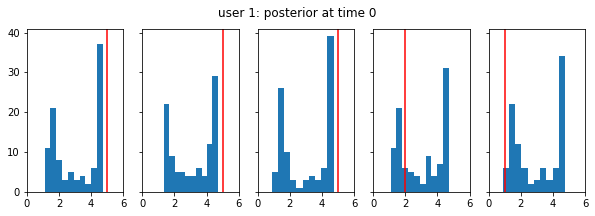

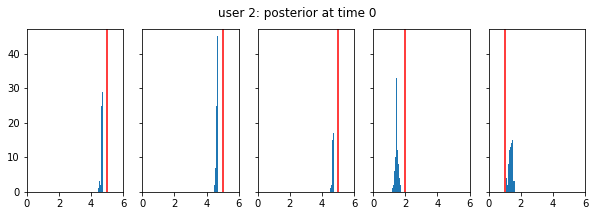

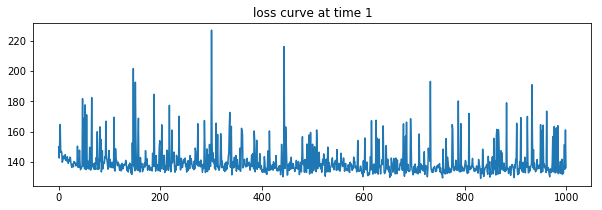

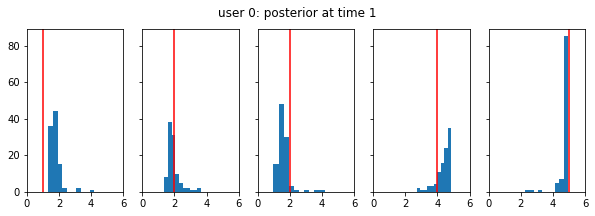

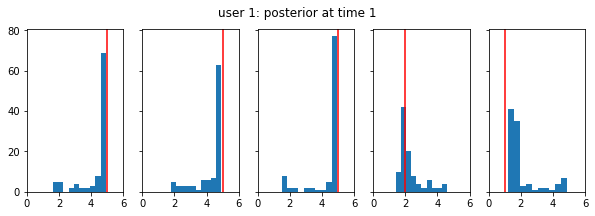

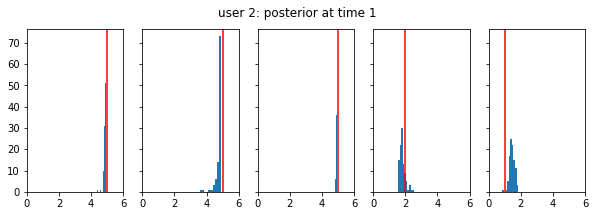

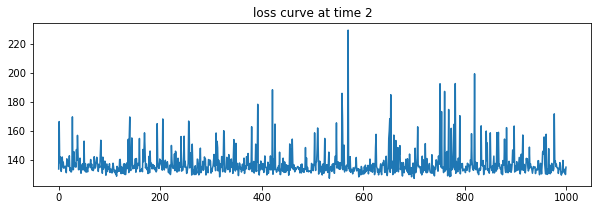

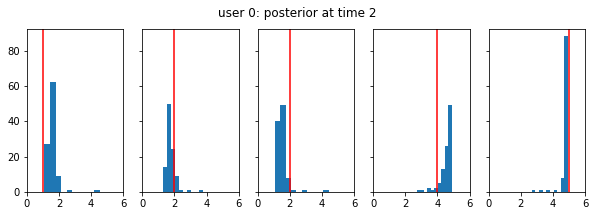

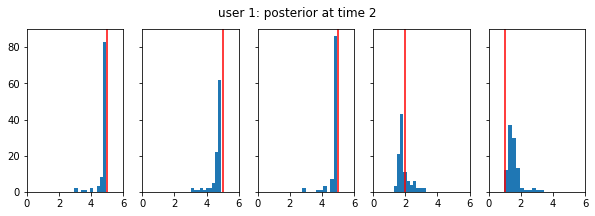

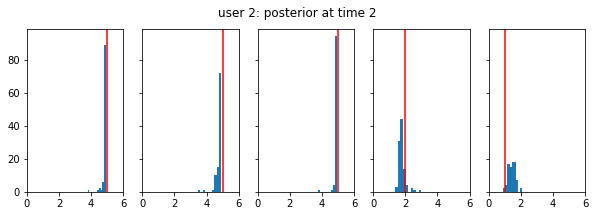

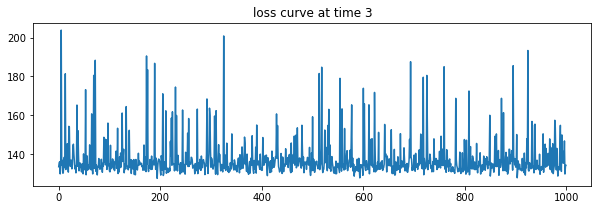

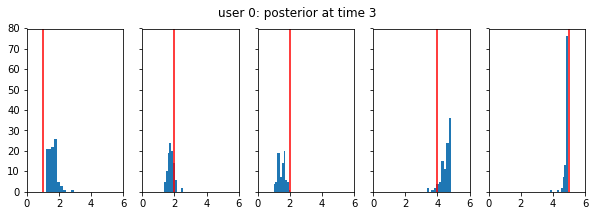

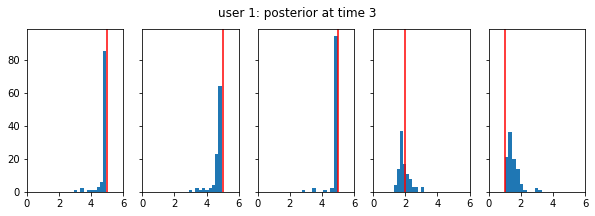

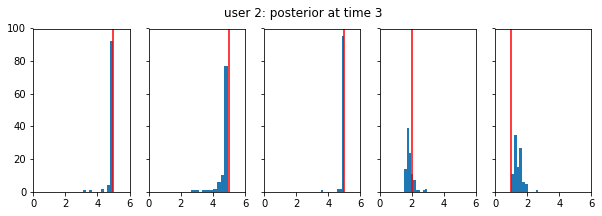

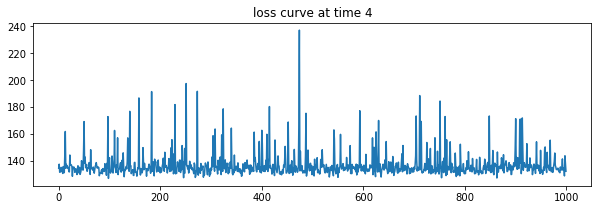

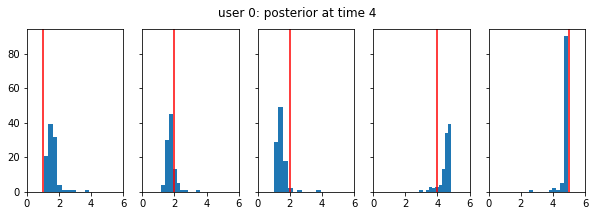

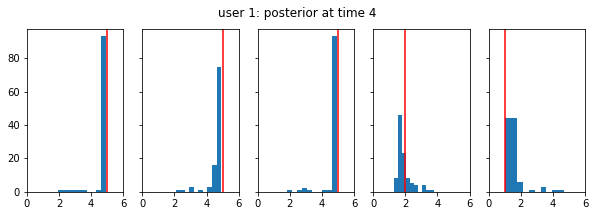

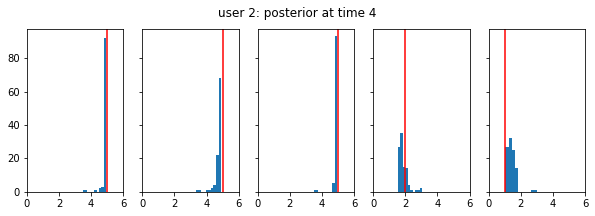

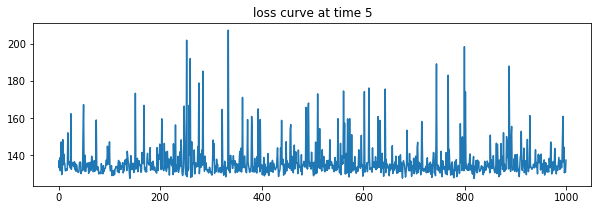

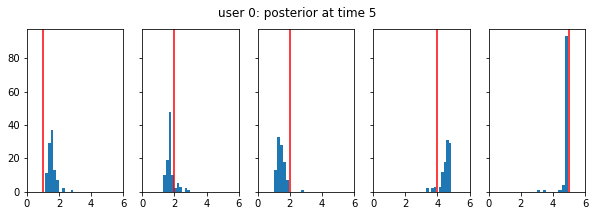

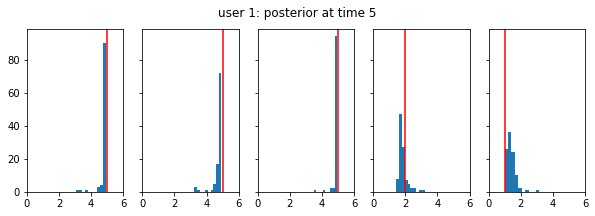

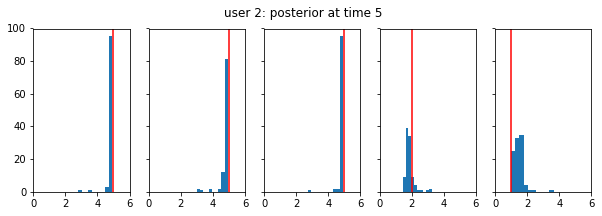

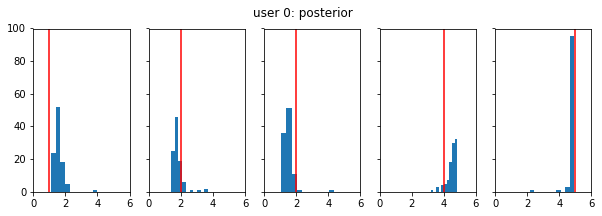

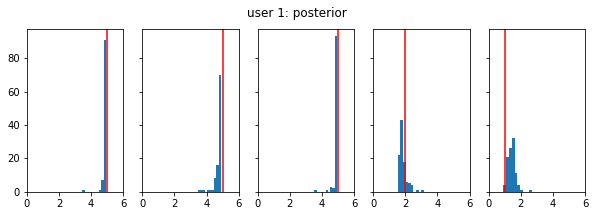

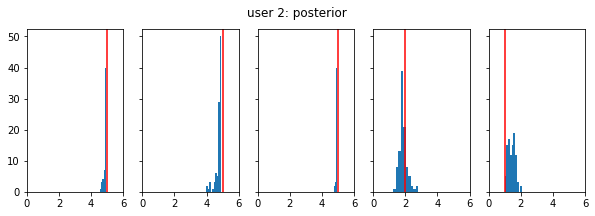

In [7]:
sess = tf.Session()
with sess.as_default():
    R= np.array([[1,2,2,4,5],\
                [5,5,5,2,1],\
                [5,5,5,2,1],\
                [1,2,1,4,5],\
                [2,2,1,4,5],\
                [4,5,5,2,2],\
                [1,2,1,5,5],\
                [5,5,5,2,1],\
                [5,5,5,2,1],\
                [1,2,1,4,5],\
                [2,2,1,4,5],\
                [4,5,5,2,2],\
                [1,2,1,5,5],\
                [5,5,5,2,1],\
                [5,5,5,2,1],\
                [1,2,1,4,5],\
                [2,2,1,4,5],\
                [4,5,5,2,2],\
                [1,2,1,5,5],\
                [5,5,5,2,1],\
                [2,2,1,5,4]])


    mask = np.array([[1,1,1,1,1],\
                      [0,0,0,0,0],\
                      [1,1,1,1,1],\
                      [1,1,1,1,1],\
                      [1,1,1,1,1],\
                      [1,1,1,1,1],\
                      [1,1,1,1,1],\
                      [1,1,1,1,1],\
                      [1,1,1,1,1],\
                      [1,1,1,1,1],\
                      [1,1,1,1,1],\
                      [1,1,1,1,1],\
                      [1,1,1,1,1],\
                      [1,1,1,1,1],\
                      [1,1,1,1,1],\
                      [1,1,1,1,1],\
                      [1,1,1,1,1],\
                      [1,1,1,1,1],\
                      [1,1,1,1,1],\
                      [1,1,1,1,1],\
                      [1,1,1,1,1]])

    def plot_R(rhats, r=None, title=''):
        _, n_items = rhats.shape
        f, axes = plt.subplots(1, n_items, sharex=True, sharey=True)
        i = 0
        for j in range(n_items):
            if r is not None:
                axes[j].axvline(x=r[j], color='r')
            axes[j].hist(rhats[:,j])
        plt.xlim([0,6])
        f.suptitle(title)
        plt.show()

    def plot(title):
        plot_R(model.sample_user_ratings(0), R[0,:], title='user 0: {}'.format(title))
        plot_R(model.sample_user_ratings(1), R[1,:], title='user 1: {}'.format(title))
        plot_R(model.sample_user_ratings(2), R[2,:], title='user 2: {}'.format(title))

    def train_and_plot_at_time(mask, time):
        losses = model.train(mask=mask, verbose=True)
        plt.plot(losses)
        plt.title('loss curve at time {}'.format(time))
        plt.show()
        plot('posterior at time {}'.format(time))

    # Don't change these.
    TIME = 0
    USER = 1 # Test on user 1
    N, M = R.shape

    model = MODEL(ratings_matrix=R, **kwargs)

    print("User {} is being shown 1 item at a time, from left to right.".format(USER))
    plot('prior')
    train_and_plot_at_time(mask, TIME)

    for m in range(M):
        TIME += 1
        mask[USER][m] = 1 # Mark it as seen
        train_and_plot_at_time(mask, TIME)

    plot('posterior')
    
    save_graph_parameters('svinnmf_vars.pkl')

Note the simple model is smoothing over the unknown user's predictions. I wonder if this can be fixed with better hyperparams.

In [8]:
#model.sample_user_ratings(0)

In [9]:
sess.close()
tf.reset_default_graph()

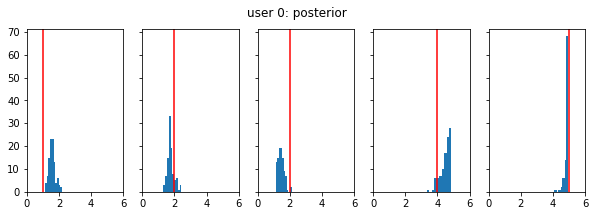

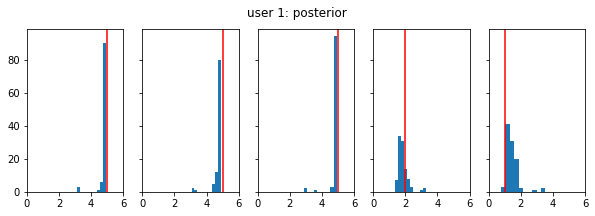

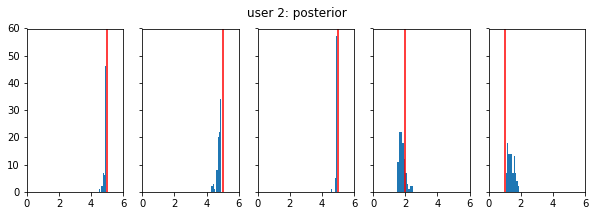

In [10]:
sess = tf.Session()
with sess.as_default():
    model = MODEL(ratings_matrix=R, **kwargs)
    load_graph_parameters('svinnmf_vars.pkl')
    plot('posterior')

In [11]:
sess.close()
tf.reset_default_graph()